In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [23]:
fashion_mnist = tf.keras.datasets.fashion_mnist

# Veri kümesini yüklemek, dört NumPy dizisi döndürür:
(train_images, train_labels) , (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
"""Etiket	Sınıf
0	tişört/üst
1	pantolon
2	Kenara çekmek
3	Elbise
4	Kaban
5	Sandalet
6	Gömlek
7	Spor ayakkabı
8	Çanta
9	Bilek boyu bot"""

'Etiket\tSınıf\n0\ttişört/üst\n1\tpantolon\n2\tKenara çekmek\n3\tElbise\n4\tKaban\n5\tSandalet\n6\tGömlek\n7\tSpor ayakkabı\n8\tÇanta\n9\tBilek boyu bot'

In [24]:
"""Her görüntü tek bir etikete eşlenir. Sınıf adları veri kümesine dahil edilmediğinden, daha sonra
görüntüleri çizerken kullanmak üzere bunları burada saklayın:

"""
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [25]:
train_images.shape

(60000, 28, 28)

In [26]:
len(train_labels)

60000

In [27]:
test_images.shape

(10000, 28, 28)

In [28]:
len(test_labels)

10000

**Verileri önceden işleyin**

### Ağı eğitmeden önce veriler önceden işlenmelidir. Eğitim setindeki ilk görüntüyü incelerseniz piksel değerlerinin 0 ile 255 aralığında olduğunu göreceksiniz:

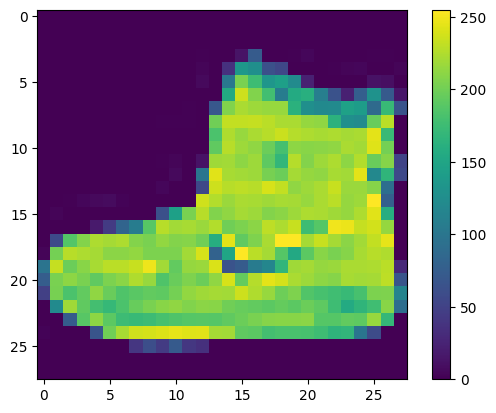

In [29]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar() # renk sayılarını gösteren bar
plt.grid(False)
plt.show()

### Sinir ağı modeline beslemeden önce bu değerleri 0 ile 1 arasında ölçeklendirin. Bunu yapmak için değerleri 255'e bölün. Eğitim setinin ve test setinin aynı şekilde ön işleme tabi tutulması önemlidir:



In [30]:
train_images = train_images / 255.0
test_images = test_images / 255.0


### Verilerin doğru formatta olduğunu ve ağı kurmaya ve eğitmeye hazır olduğunuzu doğrulamak için, eğitim setinden ilk 25 görüntüyü görüntüleyelim ve her görüntünün altında sınıf adını görüntüleyelim.

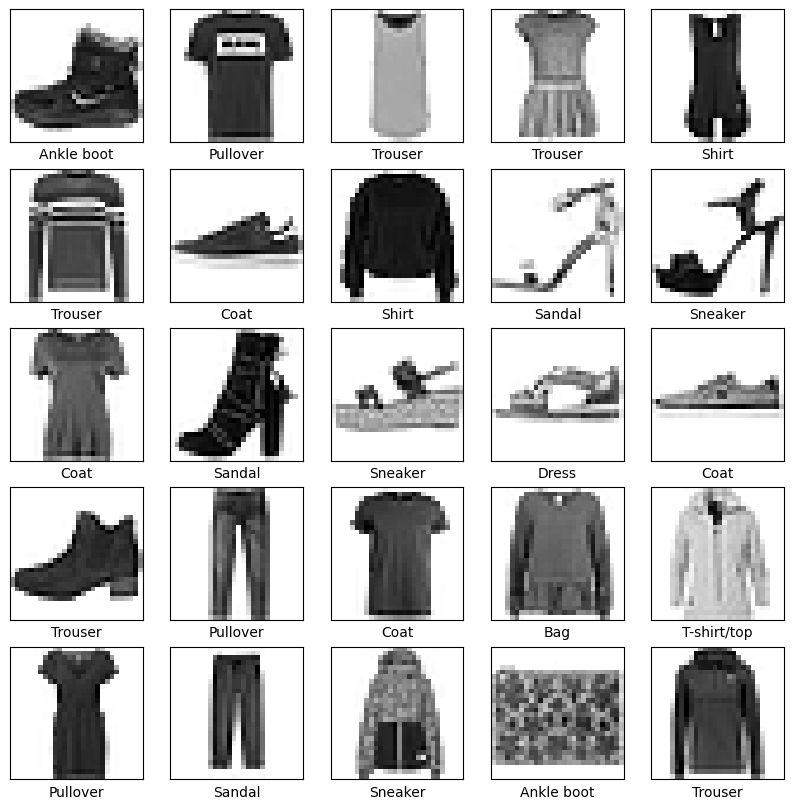

In [31]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[test_labels[i]])
plt.show()

### Modeli oluşturun
Sinir ağının oluşturulması, modelin katmanlarının yapılandırılmasını ve ardından modelin derlenmesini gerektirir.

Katmanları ayarlayın
Bir sinir ağının temel yapı taşı katmandır . Katmanlar, kendilerine beslenen verilerden temsilleri çıkarır. Umarım, bu temsiller eldeki sorun için anlamlıdır.

Derin öğrenmenin çoğu, basit katmanları birbirine zincirlemekten oluşur. tf.keras.layers.Dense gibi çoğu katman, eğitim sırasında öğrenilen parametrelere sahiptir.

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10)
])

Bu ağdaki ilk katman olan tf.keras.layers.Flatten , görüntülerin formatını iki boyutlu bir diziden (28 x 28 piksel) tek boyutlu bir diziye (28 * 28 = 784 piksel) dönüştürür. Bu katmanı, görüntüdeki piksel sıralarını kaldırmak ve bunları hizalamak olarak düşünün. Bu katmanın öğrenilecek parametresi yoktur; yalnızca verileri yeniden biçimlendirir.

Pikseller düzleştirildikten sonra ağ, iki tf.keras.layers.Dense katmanından oluşan bir diziden oluşur. Bunlar yoğun şekilde bağlı veya tamamen bağlı sinir katmanlarıdır. İlk Dense katmanda 128 düğüm (veya nöron) bulunur. İkinci (ve son) katman, 10 uzunluğunda bir logits dizisi döndürür. Her düğüm, geçerli görüntünün 10 sınıftan birine ait olduğunu gösteren bir puan içerir.

### **Modeli derleyin**

Model eğitime hazır olmadan önce birkaç ayara daha ihtiyacı var. Bunlar, modelin derleme adımı sırasında eklenir:


Optimizer (Optimize Edici): optimizer='adam' ile belirtilmiştir. Optimize edici, modelin öğrenme sürecini yöneten bir algoritmadır. 'Adam', adaptif moment tahmini (Adaptive Moment Estimation) algoritmasını temsil eder ve genellikle gradient tabanlı optimizasyon problemlerinde etkili olan popüler bir optimizasyon algoritmasıdır. Adam, gradient iniş algoritmalarından biridir ve genellikle hızlı ve etkili bir şekilde işler.

Loss Function (Kayıp Fonksiyonu): loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ile belirtilmiştir. Kayıp fonksiyonu, modelin tahminlerinin gerçek etiketlerden ne kadar uzak olduğunu ölçer. SparseCategoricalCrossentropy, çok sınıflı sınıflandırma problemleri için kullanılan bir kayıp fonksiyonudur. from_logits=True parametresi, modelin çıktılarının doğrudan modelin son katmanından geldiğini belirtir.

Metrics (Metrikler): metrics=['accuracy'] ile belirtilmiştir. Metrikler, modelin performansını ölçmek için kullanılan ölçümlerdir. Burada, sınıflandırma doğruluğu (accuracy) metriği kullanılır. Doğruluk, modelin doğru sınıflandırma yüzdesini gösterir.



### **Modeli eğit**

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5031 - accuracy: 0.8228
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3766 - accuracy: 0.8634
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3400 - accuracy: 0.8741
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3154 - accuracy: 0.8837
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2968 - accuracy: 0.8902
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2832 - accuracy: 0.8948
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2706 - accuracy: 0.8991
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2602 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2482 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.240

Model ilerlerken, kayıp ve doğruluk metrikleri görüntülenir. Bu model, eğitim verilerinde yaklaşık 0.91 (veya %91) doğruluğa ulaşır.

### Doğruluğu değerlendirin
Ardından, modelin test veri kümesinde nasıl performans gösterdiğini karşılaştırın:

`test_images`: Test veri seti içindeki görüntülerden oluşan bir dizi.

`test_labels`: Test veri setindeki görüntülerin etiketlerinden oluşan bir dizi.

`verbose`: Opsiyonel bir parametredir ve çıktının ayrıntısını belirler.

0, sadece ilerleme çubuğunu gösterirken, 1 (varsayılan değer) ayrıntılı ilerleme çıktısı sağlar ve 2, ilerlemenin çıktısını kapatır.
Bu satır, modelin test verileri üzerinde değerlendirilmesini gerçekleştirir ve iki değer döndürür:

`test_loss`: Test veri seti üzerindeki kayıp değeri. Kayıp değeri, modelin test verileri üzerinde ne kadar başarılı olduğunu belirtir. Daha düşük kayıp değerleri, modelin daha iyi performans gösterdiğini gösterir.

`test_acc`: Test veri seti üzerindeki doğruluk (accuracy) değeri. Doğruluk, modelin test verileri üzerindeki doğru sınıflandırma yüzdesini gösterir. Daha yüksek doğruluk değerleri, modelin daha iyi performans gösterdiğini gösterir.

In [36]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy:",test_acc)

313/313 - 1s - loss: 0.3333 - accuracy: 0.8780 - 505ms/epoch - 2ms/step
Test accuracy: 0.878000020980835


Test veri setindeki doğruluğun, eğitim veri setindeki doğruluktan biraz daha az olduğu ortaya çıktı. Eğitim doğruluğu ve test doğruluğu arasındaki bu boşluk, fazla uydurmayı temsil eder. Bir makine öğrenimi modeli, yeni, daha önce görülmemiş girdilerde eğitim verilerinde olduğundan daha kötü performans gösterdiğinde, aşırı uyum gerçekleşir. Fazla takılan bir model, eğitim veri kümesindeki gürültüyü ve ayrıntıları, modelin yeni veriler üzerindeki performansını olumsuz yönde etkileyecek bir noktaya "belleğe alır".

### **tahminlerde bulunun**
Eğitilen model ile bazı görüntüler hakkında tahminler yapmak için kullanabilirsiniz. Modelin doğrusal çıktılarını - logitleri - yorumlaması daha kolay olması gereken olasılıklara dönüştürmek için bir softmax katmanı ekleyin.

In [37]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [38]:
predictions = probability_model.predict(test_images)


313/313 [==============================] - 1s 2ms/step


In [39]:
predictions[0]

array([6.9105336e-05, 8.0580707e-09, 5.3421547e-09, 4.4200667e-13,
       3.1804461e-08, 7.2987453e-04, 1.2972706e-06, 8.2098441e-03,
       1.0540145e-07, 9.9098969e-01], dtype=float32)

In [40]:
np.argmax(predictions[0])

9

In [41]:
test_labels[0]

9

Bu nedenle model, bu görüntünün bir ayak bileği botu veya class_names[9] olduğundan en çok emindir. Test etiketinin incelenmesi, bu sınıflandırmanın doğru olduğunu gösterir:

In [42]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Tahminleri doğrula
Eğitilen model ile bazı görüntüler hakkında tahminler yapmak için kullanabilirsiniz.

0. resme, tahminlere ve tahmin dizisine bakalım. Doğru tahmin etiketleri mavidir ve yanlış tahmin etiketleri kırmızıdır. Sayı, tahmin edilen etiketin yüzdesini (100 üzerinden) verir.

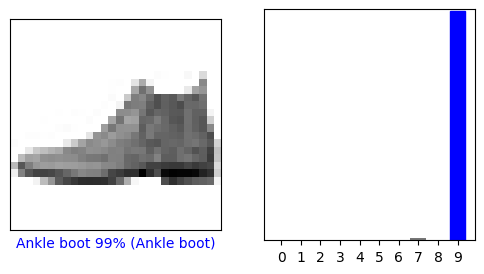

In [45]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

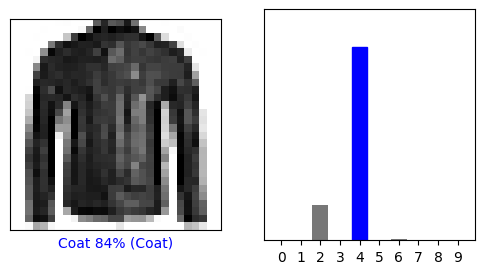

In [50]:
i = 50
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

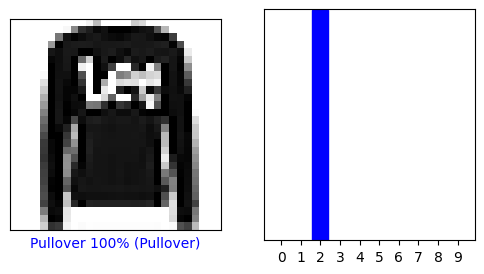

In [53]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

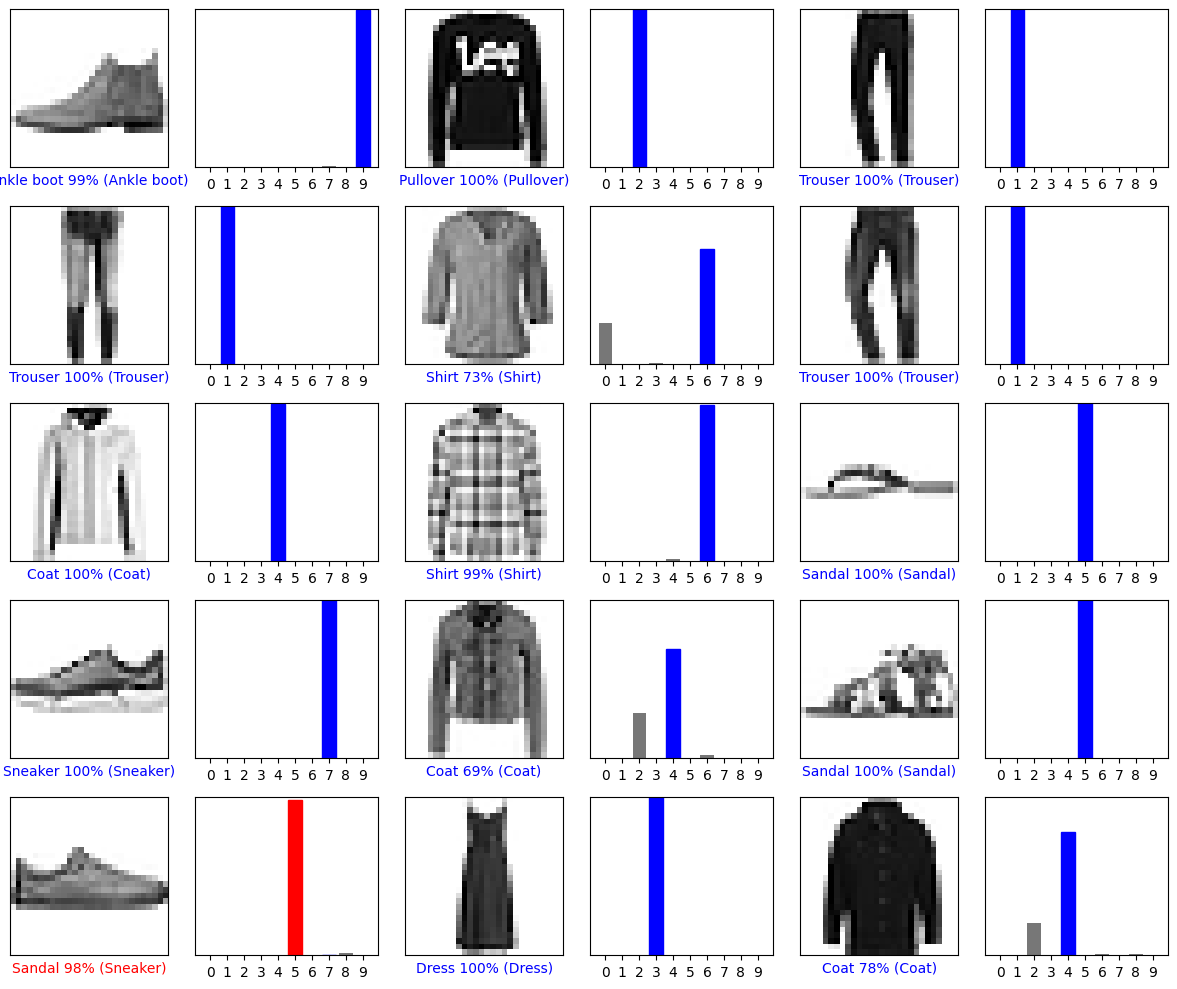

In [55]:
rows=5
cols=3

num_images = rows * cols
plt.figure(figsize=(2*2*cols, 2*rows))

for i in range(num_images):
  plt.subplot(rows, 2*cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(rows, 2*cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
